In [1]:
# Load libraries and data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('ferryticket_counts.csv')

df.columns = df.columns.str.replace(' ', '_').str.lower()

print(df.head()) # Check the first few rows of the dataset

   _id            timestamp  redemption_count  sales_count
0    1  2026-02-06T14:45:00                25           21
1    2  2026-02-06T14:30:00                 4            4
2    3  2026-02-06T14:15:00                 7            4
3    4  2026-02-06T14:00:00                19           39
4    5  2026-02-06T13:45:00                18           12


#### Filtering the data:

In [2]:
# Clean the timestamp data up, since we want to get days and hourly data.

## First, convert the timestamp to a datetime object. This will allow easier day/hour extraction.
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Split and extract day
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time
df['day_of_week'] = df['timestamp'].dt.day_name()

df # check the data - looks good!

,_id,timestamp,redemption_count,sales_count,date,time,day_of_week
0,1,2026-02-06 14:45:00,25,21,2026-02-06,14:45:00,Friday
1,2,2026-02-06 14:30:00,4,4,2026-02-06,14:30:00,Friday
2,3,2026-02-06 14:15:00,7,4,2026-02-06,14:15:00,Friday
3,4,2026-02-06 14:00:00,19,39,2026-02-06,14:00:00,Friday
4,5,2026-02-06 13:45:00,18,12,2026-02-06,13:45:00,Friday
...,...,...,...,...,...,...,...
264394,264395,2015-05-04 16:00:00,0,2,2015-05-04,16:00:00,Monday
264395,264396,2015-05-01 16:00:00,1,0,2015-05-01,16:00:00,Friday
264396,264397,2015-05-01 15:45:00,0,1,2015-05-01,15:45:00,Friday
264397,264398,2015-05-01 15:15:00,0,2,2015-05-01,15:15:00,Friday


In [3]:
# Now, aggregate data by hour and day of the week to see trends.
df['hour'] = df['timestamp'].dt.hour

# I want to remove the COVID data because the ferry wasn't running, so let's filter out the data from 2020 and 2021 (since the ferry closed in 2020 and was reopened at full capacity in late summer 2021).
df = df[~((df['timestamp'].dt.year == 2020) | ((df['timestamp'].dt.year == 2021)))]

# Calculate average sales count per hour for each day of the week
## But we're going to filter out the COVID data 
hourly_counts = df.groupby(['day_of_week', 'hour'])['sales_count'].mean().unstack()

# Check unique years remaining - good, 2020 and 2021 are out.
print("Years in dataset:", df['timestamp'].dt.year.unique())



Years in dataset: [2026 2025 2024 2023 2022 2019 2018 2017 2016 2015]


In [4]:
# Filter out only the "nice weather" months (May to September) to see if daily/hourly trends in the data during the peak ferry season.
df['month'] = df['timestamp'].dt.month
df_peak_season = df[df['month'].isin([5, 6, 7, 8, 9])]

# Filter out times between 6 AM and midnight, since the ferry typically doesn't run overnight.
df_peak_season = df_peak_season[(df_peak_season['hour'] >= 6) & (df_peak_season['hour'] <= 23)]

/var/folders/7y/hcqkqtxn3_sdc0gtn_ng23fm0000gn/T/ipykernel_8197/2338972918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['timestamp'].dt.month


In [5]:
# Now we can calculate the average sales count per hour for each day of the week during the peak season.
hourly_counts_peak_season = df_peak_season.groupby(['day_of_week', 'hour'])['sales_count'].mean().unstack()

hourly_counts_peak_season

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,
Friday,8.655512,15.681217,49.640306,109.396154,157.278497,190.317602,184.190294,170.950192,168.482051,146.183099,124.606138,100.994885,83.768340,74.409857,55.398184,46.097113,42.330667,31.754584
Monday,9.221053,15.424791,42.470361,93.838501,156.279431,198.568123,198.048969,188.673102,179.814194,155.211964,123.178663,102.011628,71.661899,49.858090,31.250991,25.426630,24.345455,13.718400
Saturday,12.539326,26.410364,62.515831,142.124836,231.283290,294.124031,322.970323,329.719638,317.216495,286.099870,238.216428,183.530323,125.402062,90.540682,63.036891,47.150266,37.933514,28.828530
Sunday,10.854348,26.142229,64.266756,136.103268,228.392718,294.423927,316.344473,320.857881,311.563636,274.829843,220.326746,158.455614,106.812665,71.480692,42.932796,29.533887,23.968661,19.925806
Thursday,9.909091,13.879195,36.722646,93.184615,137.348329,159.951407,165.304236,144.790427,135.281654,115.008986,96.269231,81.923372,65.529793,49.135348,37.527487,33.025367,23.495277,21.472973
Tuesday,9.072527,14.014726,39.882051,82.615385,109.713918,145.507079,137.267352,133.921087,128.278137,111.353247,98.086340,75.447334,61.522078,44.126816,40.485372,25.806849,19.079387,13.668246
Wednesday,10.549696,17.865333,44.802799,97.632653,130.695876,165.170483,157.044586,145.278772,134.997439,119.338462,94.225765,81.202290,61.433938,52.279161,31.877470,28.478495,26.866022,12.295238


In [6]:
# Finally, aggregate them over weekday and weekend.
df_peak_season['is_weekend'] = df_peak_season['day_of_week'].isin(['Saturday', 'Sunday'])
hourly_counts_weekend = df_peak_season.groupby(['is_weekend', 'hour'])['sales_count'].mean().unstack()

#### Visualization

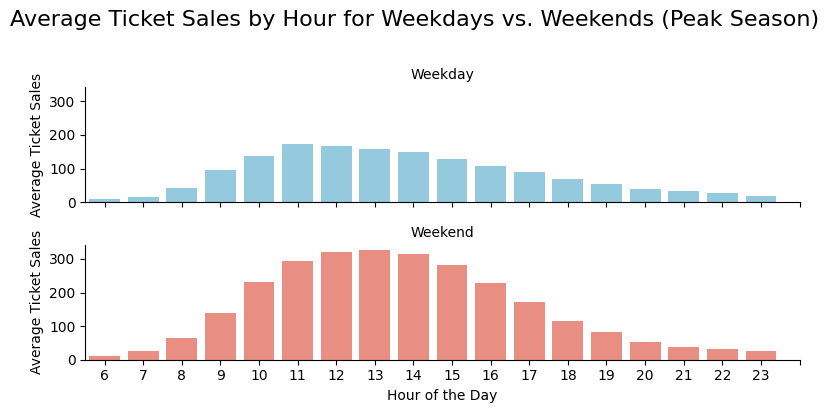

In [7]:
# 1. Reshape the aggregated data to a long format for easier plotting with seaborn
df_plot_final = hourly_counts_weekend.stack().reset_index(name='avg_sales_count')
df_plot_final['day_type'] = df_plot_final['is_weekend'].map({True: 'Weekend', False: 'Weekday'})

# 2. Plot two stacked charts in a facet grid - one for weekday and one for weekend, with different colors.
plot = sns.catplot(
    data=df_plot_final,
    x='hour',
    y='avg_sales_count',
    row='day_type',
    hue='day_type',
    palette={'Weekend': 'salmon', 'Weekday': 'skyblue'},
    kind='bar',
    height=2, # Make it smaller to view more easily against each other
    aspect=4,
    legend=False
)

# 3. Formatting
plot.set_axis_labels("Hour of the Day", "Average Ticket Sales")
plot.set(xlim=(None, 23)) # Adjusts the view to end at midnight
plot.set_titles("{row_name}")
plot.set(xticks=range(0, 23))
plt.xlim(xmax=18)
plot.fig.suptitle("Average Ticket Sales by Hour for Weekdays vs. Weekends (Peak Season)", y=1.02, fontsize=16)


plt.tight_layout()
plt.show()

In [9]:
# Filter and write the data for use with Google Sheets for the next component of this project
# Filter out only the "nice weather" months (May to September) to see if daily/hourly trends in the data during the peak ferry season.
df_off_season = df[df['month'].isin([1, 2, 3, 4, 10, 11, 12])]

# Filter out times between 6 AM and midnight, since the ferry typically doesn't run overnight.
df_off_season = df_off_season[(df_off_season['hour'] >= 6) & (df_off_season['hour'] <= 23)]

df_off_season.to_csv("off_season_sales.csv")